In [91]:
# https://www.youtube.com/watch?app=desktop&v=G_UYXzGuqvM

In [92]:
group = 'FIK'

speaks = {
	'I': 0,
	'K': 0,
	'F': 0,
	'D': 0,
}
for letter in group:
    speaks[letter] += 1


speaks = {key: group.count(key) for key in group}
key_of_one = next((key for key, value in speaks.items() if value == 1), None)
print(f"Key with value of 1: {key_of_one}")

has_value_of_2 = any(value == 2 for value in speaks.values())
if any(value == 2 for value in speaks.values()):
    print("The speaks dictionary has a value of 2.")
else:
    print("The speaks dictionary does not have any values of 2.")

key_of_zero = next((key for key, value in speaks.items() if value == 0), None)
print(f"Key with value of 0: {key_of_zero}")


Key with value of 1: F
The speaks dictionary does not have any values of 2.
Key with value of 0: None


In [93]:
board = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

for i, row in enumerate(board):
    print(row)

[5, 3, 0, 0, 7, 0, 0, 0, 0]
[6, 0, 0, 1, 9, 5, 0, 0, 0]
[0, 9, 8, 0, 0, 0, 0, 6, 0]
[8, 0, 0, 0, 6, 0, 0, 0, 3]
[4, 0, 0, 8, 0, 3, 0, 0, 1]
[7, 0, 0, 0, 2, 0, 0, 0, 6]
[0, 6, 0, 0, 0, 0, 2, 8, 0]
[0, 0, 0, 4, 1, 9, 0, 0, 5]
[0, 0, 0, 0, 8, 0, 0, 7, 9]


In [94]:
import numpy as np

print(np.matrix(board))

[[5 3 0 0 7 0 0 0 0]
 [6 0 0 1 9 5 0 0 0]
 [0 9 8 0 0 0 0 6 0]
 [8 0 0 0 6 0 0 0 3]
 [4 0 0 8 0 3 0 0 1]
 [7 0 0 0 2 0 0 0 6]
 [0 6 0 0 0 0 2 8 0]
 [0 0 0 4 1 9 0 0 5]
 [0 0 0 0 8 0 0 7 9]]


In [95]:
def possible(y,x,n):
    global board
    for i in range(0,9):
        if board[y][i] == n:
            return False
    for i in range(0,9):
        if board[i][x] == n:
            return False
    x0 = (x//3)*3
    y0 = (y//3)*3
    for i in range(0,3):
        for j in range(0,3):
            if board[y0+i][x0+j] == n:
                return False
    return True
        

In [96]:
def solve():
    global board
    for y in range(9):
        for x in range(9):
            if board[y][x] == 0:
                for n in range(1, 10):
                    if possible(y, x, n):
                        board[y][x] = n
                        solve()
                        board[y][x] = 0
                return
    print(np.matrix(board))
    input("More?")

In [97]:
solve()

[[5 3 4 6 7 8 9 1 2]
 [6 7 2 1 9 5 3 4 8]
 [1 9 8 3 4 2 5 6 7]
 [8 5 9 7 6 1 4 2 3]
 [4 2 6 8 5 3 7 9 1]
 [7 1 3 9 2 4 8 5 6]
 [9 6 1 5 3 7 2 8 4]
 [2 8 7 4 1 9 6 3 5]
 [3 4 5 2 8 6 1 7 9]]


In [98]:
import string

my_list = ['abc', 'def hij']

def find_abc(s):
	vals = 0
	letters = string.ascii_lowercase
	#nested loops here
	for i, st in enumerate(my_list):
		for letter in st:
			if letter == ' ':
				continue
			vals += letters.index(letter.lower()) + 1
		vals *= (i + 1)
	return vals
	
 
 


In [99]:
def duck_goose(players, goose):
    #players
	return players[(goose-1) % len(players)].name

In [100]:
#pip3 install torch torchvision torchaudio

In [101]:
import numpy as np
from torch.utils.data import Dataset
import torch


#take two timer series and train our models on those datasets 
# https://github.com/jbrownlee/Datasets
# create new symbolicDataset to be sin(2 * pi * x^2) + cos3 * pi * x^2)
# contained in self.y


class SymbolicDataset(Dataset):
    def __init__(self, num_samples, noise_level):
        # Inputs obtained from sampling a uniform distribution
        self.x = np.random.uniform(0, 10, (num_samples, 1)).astype(np.float32)
        #Outputs calculated as per the periodic formula (shown above)
        self.y = (np.sin(2 * np.pi * self.x ) + np.cos(3 * np.pi * self.x)).astype(np.float32)
        #Noise addition
        self.y += noise_level * np.random.randn(*self.y.shape).astype(np.float32)

    # Method that returns the number of samples in the dataset
    def __len__(self):
        return len(self.x)
    
    # Method that retrieves the sample at index 'idx'
    def __getitem__(self, idx):
        x = torch.from_numpy(self.x[idx])
        y = torch.from_numpy(self.y[idx])
        return x, y

In [102]:
# Create an instance of the SymbolicDataset class
dataset = SymbolicDataset(num_samples=1000, noise_level=0.1)

# Example of how to retrieve a sample from the dataset
sample_x, sample_y = dataset[0]
print(f"Sample x: {sample_x}, Sample y: {sample_y}")

Sample x: tensor([9.6658]), Sample y: tensor([-1.8909])


In [103]:
import torch
import torch.nn as nn

class FANLayer(nn.Module):
    def __init__(self, in_features, d_p, d_p_bar, activation=nn.GELU()):
        super().__init__()
        self.Wp = nn.Parameter(torch.randn(in_features, d_p))
        self.Wp_bar = nn.Parameter(torch.randn(in_features, d_p_bar))
        self.Bp_bar = nn.Parameter(torch.zeros(d_p_bar))
        self.activation = activation 

    def forward(self, x):
        cos_term = torch.cos(torch.matmul(x, self.Wp))
        sin_term = torch.sin(torch.matmul(x, self.Wp))
        non_periodic_term = self.activation(torch.matmul(x, self.Wp_bar) + self.Bp_bar)
        return torch.cat([cos_term, sin_term, non_periodic_term], dim=-1)
    
class FAN(nn.Module):
    def __init__(self, in_features, hidden_dim, num_layers, activation=nn.GELU()):
        super().__init__()

        self.num_layers = num_layers 
        self.layers = nn.ModuleList()

        # d_p set to a quarter of the hidden dimension as per the original research paper
        d_p = hidden_dim // 4 
        d_p_bar = hidden_dim
        
        # Implementation of layers before the last layer
        for _ in range(num_layers - 1):
            self.layers.append(FANLayer(in_features, d_p, d_p_bar, activation))
            # Updated after each layer to match the output dimension of the previous layer
            in_features = 2 * d_p + d_p_bar 
        
        # Parameters for the final layer
        self.WL = nn.Parameter(torch.randn(in_features, 1))
        self.BL = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        # Implementation of the final layer
        return torch.matmul(x, self.WL) + self.BL
    

In [104]:
class MLP(nn.Module):
    def __init__(self, in_features, hidden_dim, num_layers):
        super().__init__()

        layers = []
        
        # Implementation of layers before the last layer
        for _ in range(num_layers - 1):
            layers.append(nn.Linear(in_features, hidden_dim))
            layers.append(nn.GELU()) #GELU activation similar to the FAN
            in_features = hidden_dim
        
        # Implementation of the last layer
        layers.append(nn.Linear(hidden_dim, 1))

        # Constructing a Sequential neural network with the layers
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

In [105]:
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
# Defining device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_model(train_dataset, val_dataset, model, epochs, batch_size, lr, model_name):
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    
    # Using the MSE loss
    criterion = nn.MSELoss()

    # Using the AdamW optimizer
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr)

    train_losses = []
    val_losses = []

    for epoch in tqdm(range(1, epochs + 1), desc=f"Training {model_name}"):
        # Training phase
        model.train()
        epoch_train_loss = 0.0
        for x_batch, y_batch in train_dataloader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)

            # Forward pass
            optimizer.zero_grad()
            preds = model(x_batch)
            loss = criterion(preds, y_batch)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item() * x_batch.size(0)

        # Validation phase
        model.eval()
        epoch_val_loss = 0.0
        with torch.no_grad():
            for x_batch, y_batch in val_dataloader:
                x_batch, y_batch = x_batch.to(device), y_batch.to(device)
                preds = model(x_batch)
                loss = criterion(preds, y_batch)
                epoch_val_loss += loss.item() * x_batch.size(0)

        # Computing average losses
        epoch_train_loss /= len(train_dataset)
        epoch_val_loss /= len(val_dataset)
        train_losses.append(epoch_train_loss)
        val_losses.append(epoch_val_loss)

        # Printing losses every 50 epochs
        if epoch % 50 == 0 or epoch == 1 or epoch == epochs:
            print(f"Epoch {epoch}/{epochs} - {model_name} Training Loss: {epoch_train_loss:.6f}, Validation Loss: {epoch_val_loss:.6f}")

    return train_losses, val_losses

In [106]:
import torch
from torch.utils.data import random_split

# Defining device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Device check
print(f"Using device: {device}")
#print(f"FAN model is on device: {next(fan_model.parameters()).device}")
#print(f"MLP model is on device: {next(mlp_model.parameters()).device}")

# Preparing dataset
dataset = SymbolicDataset(num_samples=1000, noise_level=0.1)

# Splitting dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Preparing models
fan_model = FAN(in_features=1, hidden_dim=32, num_layers=3).to(device)
mlp_model = MLP(in_features=1, hidden_dim=32, num_layers=3).to(device)

# Training the FAN model
print("\nStarting training for FAN model...")
fan_train_losses, fan_val_losses = train_model(train_dataset, val_dataset, fan_model, epochs=500, batch_size=32, lr=0.001, model_name="FAN")

# Training the MLP model
print("\nStarting training for MLP model...")
mlp_train_losses, mlp_val_losses = train_model(train_dataset, val_dataset, mlp_model, epochs=500, batch_size=32, lr=0.001, model_name="MLP")

Using device: cpu

Starting training for FAN model...


Training FAN:   0%|          | 0/500 [00:00<?, ?it/s]

Epoch 1/500 - FAN Training Loss: 99724.210000, Validation Loss: 78332.367969


Training FAN:  12%|█▏        | 60/500 [00:01<00:07, 60.70it/s]

Epoch 50/500 - FAN Training Loss: 2.648543, Validation Loss: 2.400652


Training FAN:  22%|██▏       | 109/500 [00:01<00:06, 58.29it/s]

Epoch 100/500 - FAN Training Loss: 1.349976, Validation Loss: 1.397977


Training FAN:  31%|███       | 156/500 [00:02<00:05, 61.09it/s]

Epoch 150/500 - FAN Training Loss: 0.731446, Validation Loss: 0.786400


Training FAN:  42%|████▏     | 210/500 [00:04<00:06, 46.69it/s]

Epoch 200/500 - FAN Training Loss: 0.380355, Validation Loss: 0.452001


Training FAN:  51%|█████     | 256/500 [00:05<00:04, 58.03it/s]

Epoch 250/500 - FAN Training Loss: 0.249089, Validation Loss: 0.288289


Training FAN:  62%|██████▏   | 311/500 [00:07<00:03, 52.21it/s]

Epoch 300/500 - FAN Training Loss: 0.197083, Validation Loss: 0.183704


Training FAN:  72%|███████▏  | 360/500 [00:07<00:02, 61.26it/s]

Epoch 350/500 - FAN Training Loss: 0.113333, Validation Loss: 0.118941


Training FAN:  82%|████████▏ | 409/500 [00:08<00:01, 62.96it/s]

Epoch 400/500 - FAN Training Loss: 0.067536, Validation Loss: 0.070245


Training FAN:  92%|█████████▏| 458/500 [00:09<00:00, 63.26it/s]

Epoch 450/500 - FAN Training Loss: 0.044267, Validation Loss: 0.059226


Training FAN: 100%|██████████| 500/500 [00:10<00:00, 49.27it/s]


Epoch 500/500 - FAN Training Loss: 0.035446, Validation Loss: 0.029513

Starting training for MLP model...


Training MLP:   2%|▏         | 9/500 [00:00<00:05, 85.16it/s]

Epoch 1/500 - MLP Training Loss: 0.988774, Validation Loss: 1.005222


Training MLP:  13%|█▎        | 63/500 [00:00<00:05, 86.04it/s]

Epoch 50/500 - MLP Training Loss: 0.937890, Validation Loss: 0.967361


Training MLP:  23%|██▎       | 117/500 [00:01<00:04, 86.13it/s]

Epoch 100/500 - MLP Training Loss: 0.927850, Validation Loss: 0.984142


Training MLP:  32%|███▏      | 162/500 [00:01<00:04, 79.98it/s]

Epoch 150/500 - MLP Training Loss: 0.906057, Validation Loss: 0.991903


Training MLP:  43%|████▎     | 216/500 [00:02<00:03, 82.86it/s]

Epoch 200/500 - MLP Training Loss: 0.897161, Validation Loss: 0.968650


Training MLP:  52%|█████▏    | 261/500 [00:03<00:02, 84.12it/s]

Epoch 250/500 - MLP Training Loss: 0.876422, Validation Loss: 0.945545


Training MLP:  63%|██████▎   | 315/500 [00:03<00:02, 82.69it/s]

Epoch 300/500 - MLP Training Loss: 0.859370, Validation Loss: 0.926331


Training MLP:  72%|███████▏  | 360/500 [00:04<00:01, 83.83it/s]

Epoch 350/500 - MLP Training Loss: 0.844581, Validation Loss: 0.911943


Training MLP:  83%|████████▎ | 414/500 [00:04<00:01, 84.17it/s]

Epoch 400/500 - MLP Training Loss: 0.832892, Validation Loss: 0.882177


Training MLP:  92%|█████████▏| 459/500 [00:05<00:00, 85.20it/s]

Epoch 450/500 - MLP Training Loss: 0.808994, Validation Loss: 0.855874


Training MLP: 100%|██████████| 500/500 [00:06<00:00, 83.22it/s]

Epoch 500/500 - MLP Training Loss: 0.786803, Validation Loss: 0.836532


In [107]:
import matplotlib.pyplot as plt
# Defining device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def evaluate_model(fan_model, mlp_model):
    # Creating test dataset sampled evenly (compare it with training data)
    x_test = torch.linspace(0, 10, 1000).reshape(-1, 1).float().to(device)
    y_test = np.sin(2 * np.pi * x_test.cpu().numpy()) + np.cos(3 * np.pi * x_test.cpu().numpy())
    
    fan_model.eval()
    mlp_model.eval()

    with torch.no_grad():
        fan_pred = fan_model(x_test).cpu().numpy()
        mlp_pred = mlp_model(x_test).cpu().numpy()

     # Plotting the results
    plt.figure(figsize=(12, 6))

    plt.plot(x_test.cpu().numpy(), y_test, label="True Function", color="black", linestyle="dashed")
    plt.plot(x_test.cpu().numpy(), fan_pred, label="FAN Prediction", color="blue", alpha=0.7)
    plt.plot(x_test.cpu().numpy(), mlp_pred, label="MLP Prediction", color="red", alpha=0.7)
    
    plt.legend()

    plt.title("Comparison of FAN and MLP on Symbolic Dataset")
    plt.xlabel("x")
    plt.ylabel("y")

    plt.show()

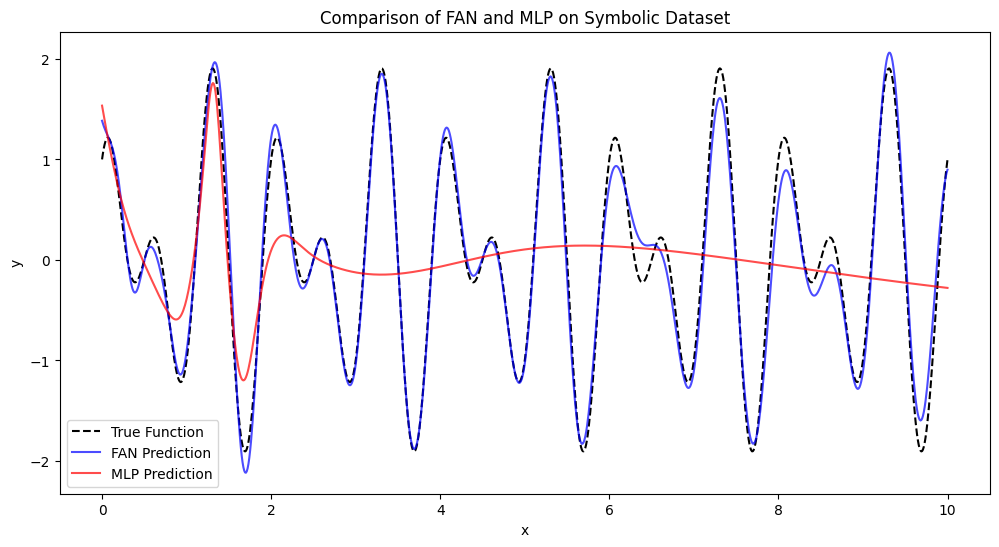

In [108]:
evaluate_model(fan_model, mlp_model)

In [109]:
# The Gated FAN layer
class FANLayerGated(nn.Module):
    def __init__(self, in_features, d_p, d_p_bar, activation=nn.GELU(), gated=True):
        super().__init__()
        self.Wp = nn.Parameter(torch.randn(in_features, d_p))
        self.Wp_bar = nn.Parameter(torch.randn(in_features, d_p_bar))
        self.Bp_bar = nn.Parameter(torch.zeros(d_p_bar))
        self.activation = activation
        if gated:
            self.gate = nn.Parameter(torch.randn(1))

    def forward(self, x):
        cos_term = torch.cos(torch.matmul(x, self.Wp))
        sin_term = torch.sin(torch.matmul(x, self.Wp))
        non_periodic_term = self.activation(torch.matmul(x, self.Wp_bar) + self.Bp_bar)
        
        if hasattr(self, 'gate'):
            gate = torch.sigmoid(self.gate)
            cos_term = gate * cos_term
            sin_term = gate * sin_term
            non_periodic_term = (1 - gate) * non_periodic_term

        return torch.cat([cos_term, sin_term, non_periodic_term], dim=-1)

# The Gated FAN model
class FANGated(nn.Module):
    def __init__(self, in_features, hidden_dim, num_layers, activation=nn.GELU(), gated=True):
        super().__init__()
        self.layers = nn.ModuleList()
        
        d_p = hidden_dim // 4
        d_p_bar = hidden_dim

        for _ in range(num_layers - 1):
            self.layers.append(FANLayerGated(in_features, d_p, d_p_bar, activation, gated))
            in_features = 2 * d_p + d_p_bar  

        self.output_layer = nn.Linear(in_features, 1) 

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return self.output_layer(x)

In [110]:
#Times Series test 1

import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

# SymbolicDataset Definition
class SymbolicDataset(Dataset):
    def __init__(self, num_samples, noise_level):
        self.x = np.random.uniform(0, 10, (num_samples, 1)).astype(np.float32)
        self.y = (np.sin(2 * np.pi * self.x) + np.cos(3 * np.pi * self.x)).astype(np.float32)
        self.y += noise_level * np.random.randn(*self.y.shape).astype(np.float32)

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        x = torch.from_numpy(self.x[idx])
        y = torch.from_numpy(self.y[idx])
        return x, y

# Regression Model Definition
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.layers(x)

# Prepare Two Datasets
dataset1 = SymbolicDataset(num_samples=1000, noise_level=0.1)
dataset2 = SymbolicDataset(num_samples=1000, noise_level=0.2)

# Combine Datasets into DataLoader
combined_loader = DataLoader(dataset1 + dataset2, batch_size=32, shuffle=True)

# Initialize Model, Loss, and Optimizer
model = RegressionModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
num_epochs = 20
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for batch_x, batch_y in combined_loader:
        optimizer.zero_grad()
        predictions = model(batch_x)
        loss = criterion(predictions, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

# Save the Model
torch.save(model.state_dict(), "symbolic_model.pth")
print("Model training completed and saved!")

Epoch [1/20], Loss: 65.9367
Epoch [2/20], Loss: 63.9594
Epoch [3/20], Loss: 63.4832
Epoch [4/20], Loss: 62.5931
Epoch [5/20], Loss: 62.5467
Epoch [6/20], Loss: 62.8471
Epoch [7/20], Loss: 62.2647
Epoch [8/20], Loss: 62.1355
Epoch [9/20], Loss: 61.8294
Epoch [10/20], Loss: 61.6605
Epoch [11/20], Loss: 61.7176
Epoch [12/20], Loss: 61.6260
Epoch [13/20], Loss: 61.7288
Epoch [14/20], Loss: 61.5624
Epoch [15/20], Loss: 61.2889
Epoch [16/20], Loss: 61.2233
Epoch [17/20], Loss: 62.2596
Epoch [18/20], Loss: 61.7622
Epoch [19/20], Loss: 61.6159
Epoch [20/20], Loss: 61.1533
Model training completed and saved!


In [111]:
#Times Series test 2

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# SymbolicDataset is already defined in your code

# Step 1: Generate Two Time Series Datasets
dataset1 = SymbolicDataset(num_samples=1000, noise_level=0.1)
dataset2 = SymbolicDataset(num_samples=1000, noise_level=0.2)

# DataLoader for batching
loader1 = DataLoader(dataset1, batch_size=32, shuffle=True)
loader2 = DataLoader(dataset2, batch_size=32, shuffle=True)

# Step 2: Define the Model
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.layers(x)

# Instantiate the model
model = RegressionModel()

# Step 3: Define Loss Function and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Training Loop
def train_model(dataloader, model, optimizer, criterion, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for x, y in dataloader:
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(x)  # Forward pass
            loss = criterion(outputs, y)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights
            total_loss += loss.item()

        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}")

# Train the model on each dataset
print("Training on Dataset 1:")
train_model(loader1, model, optimizer, criterion)

print("\nTraining on Dataset 2:")
train_model(loader2, model, optimizer, criterion)

Training on Dataset 1:
Epoch 1/10, Loss: 32.2450
Epoch 2/10, Loss: 30.6865
Epoch 3/10, Loss: 31.4935
Epoch 4/10, Loss: 31.3861
Epoch 5/10, Loss: 31.0935
Epoch 6/10, Loss: 30.3085
Epoch 7/10, Loss: 31.2436
Epoch 8/10, Loss: 29.8356
Epoch 9/10, Loss: 30.1937
Epoch 10/10, Loss: 29.9200

Training on Dataset 2:
Epoch 1/10, Loss: 30.5680
Epoch 2/10, Loss: 29.9575
Epoch 3/10, Loss: 30.7050
Epoch 4/10, Loss: 30.6774
Epoch 5/10, Loss: 30.2896
Epoch 6/10, Loss: 30.0976
Epoch 7/10, Loss: 30.2054
Epoch 8/10, Loss: 30.5029
Epoch 9/10, Loss: 30.5514
Epoch 10/10, Loss: 29.8421


In [112]:
#take two timer series and train our models on those datasets 
# https://github.com/jbrownlee/Datasets
# create new symbolicDataset to be sin(2 * pi * x^2) + cos3 * pi * x^2)
# contained in self.y

#Next is train it on the airplaine/airline data set

In [113]:
import numpy as np
import torch
from torch.utils.data import Dataset

class SymbolicDatasetComplex(Dataset):
    def __init__(self, num_samples, noise_level):
        # Inputs obtained from sampling a uniform distribution
        self.x = np.random.uniform(0, 10, (num_samples, 1)).astype(np.float32)
        # Outputs calculated as per the new formula
        self.y = (np.sin(2 * np.pi * self.x ) + np.cos(3 * np.pi * self.x)).astype(np.float32) * self.x
        # Adding noise to the outputs
        self.y += noise_level * np.random.randn(*self.y.shape).astype(np.float32)

    # Method that returns the number of samples in the dataset
    def __len__(self):
        return len(self.x)
    
    # Method that retrieves the sample at index 'idx'
    def __getitem__(self, idx):
        x = torch.from_numpy(self.x[idx])
        y = torch.from_numpy(self.y[idx])
        return x, y
    


In [114]:
dataset = SymbolicDatasetComplex(num_samples=1000, noise_level=0.1)

# Splitting dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Preparing models
fan_model_complex = FAN(in_features=1, hidden_dim=32, num_layers=3).to(device)
mlp_model_complex = MLP(in_features=1, hidden_dim=32, num_layers=3).to(device)

# Training the FAN model
print("\nStarting training for FAN model...")
fan_train_losses, fan_val_losses = train_model(train_dataset, val_dataset, fan_model_complex, epochs=500, batch_size=32, lr=0.001, model_name="FAN")

# Training the MLP model
print("\nStarting training for MLP model...")
mlp_train_losses, mlp_val_losses = train_model(train_dataset, val_dataset, mlp_model_complex, epochs=500, batch_size=32, lr=0.001, model_name="MLP")


Starting training for FAN model...


TypeError: train_model() got an unexpected keyword argument 'batch_size'

In [ ]:
def evaluate_model2(fan_model, mlp_model):
    # Creating test dataset sampled evenly (compare it with training data)
    x_test = torch.linspace(0, 10, 1000).reshape(-1, 1).float().to(device)
    y_test = np.sin(2 * np.pi * x_test.cpu().numpy()) + np.cos(3 * np.pi * x_test.cpu().numpy()) * x_test.cpu().numpy()
    
    fan_model.eval()
    mlp_model.eval()

    with torch.no_grad():
        fan_pred = fan_model(x_test).cpu().numpy()
        mlp_pred = mlp_model(x_test).cpu().numpy()

     # Plotting the results
    plt.figure(figsize=(12, 6))

    plt.plot(x_test.cpu().numpy(), y_test, label="True Function", color="black", linestyle="dashed")
    plt.plot(x_test.cpu().numpy(), fan_pred, label="FAN Prediction", color="blue", alpha=0.7)
    plt.plot(x_test.cpu().numpy(), mlp_pred, label="MLP Prediction", color="red", alpha=0.7)
    
    plt.legend()

    plt.title("Comparison of FAN and MLP on Symbolic Dataset")
    plt.xlabel("x")
    plt.ylabel("y")

    plt.show()

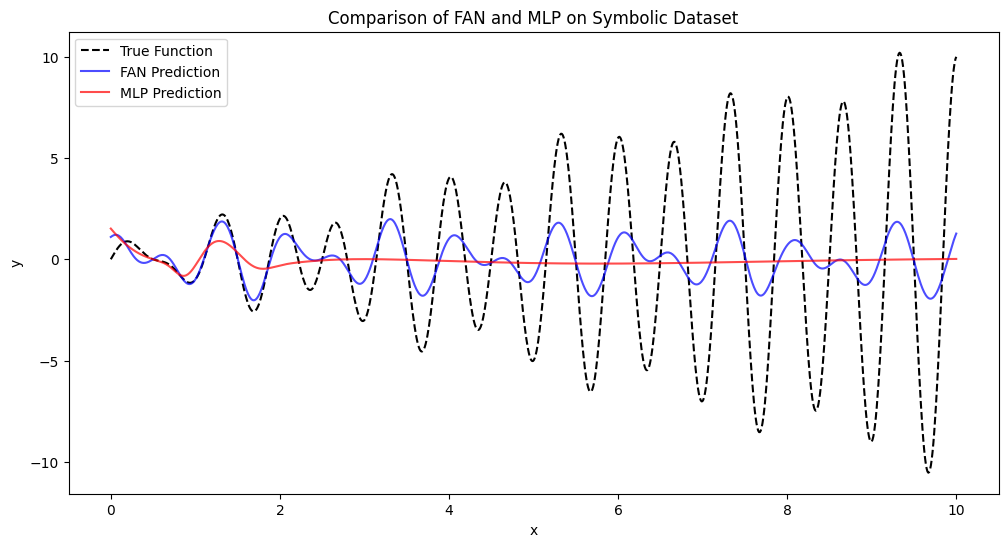

In [ ]:
evaluate_model2(fan_model, mlp_model)

In [116]:
class FAN2D(nn.Module): 
    def __init__(self, in_channels, hidden_dim, num_layers, activation=nn.GELU()): 
        super().__init__() 
        
        self.conv1 = nn.Conv2d(in_channels, hidden_dim, kernel_size=5, padding=2) 
        self.conv2 = nn.Conv2d(hidden_dim, hidden_dim, kernel_size=3, padding=1) 
        self.flatten = nn.Flatten() 
        self.fan = FAN(hidden_dim * 32 * 32, hidden_dim, num_layers, activation) 
        
    def forward(self, x): 
        x = self.conv1(x) 
        x = self.conv2(x) 
        x = self.flatten(x) 
        x = self.fan(x) 
        return x
    
#Just have to play around with, for next week get some data on esoterric
#planets to put through this function